## **Spam Ham Classification Project**
The Spam Ham Classification Project applies natural language processing and the Multinomial Naive Bayes algorithm to classify SMS messages as spam or ham. By preprocessing the text data and converting it into a numerical format, the model can accurately distinguish between spam and legitimate messages. The confusion matrix visualization provides insights into the model's performance and helps in understanding misclassifications.

### **Importing Libraries:**
The code starts by importing the necessary libraries, including nltk for natural language processing, `numpy` and `pandas` for data manipulation, and various modules from scikit-learn for machine learning tasks.

In [4]:
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

### **Loading Data:**
The dataset containing SMS messages labeled as spam or ham is loaded into a DataFrame using `pd.read_csv`.

In [5]:
df=pd.read_csv('/content/SMSSpamCollection.tsv', sep='\t', names=['labels', 'message'])
df.head()

,labels,message
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


### **Data Preprocessing:**
The text data is preprocessed to lowercase all words, tokenize the text, remove stop words (common words like "the," "is," etc.), and keep only alphabetic words using NLTK.

In [6]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
stop_words=set(stopwords.words('english'))
#stop_words

In [8]:
df['message'] = df['message'].apply(lambda x: ' '.join(term for term in nltk.word_tokenize(x.lower())
                                                       if term not in stop_words and term.isalpha()))

### **Creating Feature Matrix:**
The CountVectorizer from scikit-learn is used to convert the text data into a numeric feature matrix, representing the occurrence of words in each message.

In [9]:
count_vectorizer=CountVectorizer()
x=count_vectorizer.fit_transform(df['message'])
y=df['labels']

### **Train-Test Split:**
The data is split into training and testing sets using `train_test_split`.

In [10]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)

### **Model Training:**
The Multinomial Naive Bayes classifier is chosen for text classification. The model is trained on the training data using `model.fit`.

In [11]:
model=MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

### **Prediction and Evaluation:**
The model's predictions are obtained for the test set using model.predict. The accuracy of the model is calculated using accuracy_score, and the confusion matrix is created and visualized using `confusion_matrix`, `matplotlib`, and `seaborn`.

In [12]:
predictions=model.predict(x_test)
print('Accuracy: ',accuracy_score(y_test, predictions))
print('Confusion Matrix: \n',confusion_matrix(y_test, predictions))

Accuracy:  0.9688809096349491
Confusion Matrix: 
 [[1429   34]
 [  18  190]]


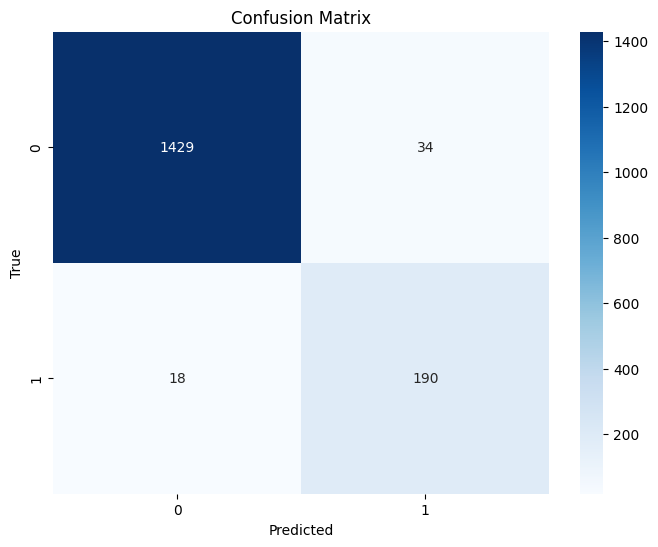

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

cm=confusion_matrix(y_test, predictions)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()